In [1]:
from threading import *
import wx
import sys

sys.path.append('T:\EL_experiment\Codes\Connectogram')

import os
import pandas as pd
import tkinter as tk
from tkinter import filedialog

import math
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D
from matplotlib.path import Path
from more_itertools import unique_everseen
from matplotlib.colors import to_hex
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import itertools
import seaborn as sns

import read_data as rd
import plot_funcs as pf
sub_path = 'X:\\4 e-Lab\\'  # y:\\eLab
import plot_connectogram
from connectogram import Connectrogram

start


In [2]:
figure_l = Connectrogram()

In [3]:
data_con_file = 'T:\EL_experiment\Codes\Connectogram\data_con_sleep.csv'

#data_con_file = sub_path + 'EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\General\data\data_con_all.csv'
if os.path.exists(data_con_file):
    data_con_all = pd.read_csv(data_con_file)
chan0 = 0
data_con = data_con_all[
    (data_con_all.ChanA != 'U') & (data_con_all.H==0)& (data_con_all.StimA != 'U') & (~np.isnan(data_con_all.DI))]
data_con = data_con.reset_index(drop=True)
data_con = rd.get_Region_data_con(data_con)
for subj in np.unique(data_con.Subj):
    data_con.loc[data_con.Subj == subj, 'Stim'] = data_con.loc[data_con.Subj == subj, 'Stim'] + chan0
    data_con.loc[data_con.Subj == subj, 'Chan'] = data_con.loc[data_con.Subj == subj, 'Chan'] + chan0
    chan0 = np.max(data_con.loc[data_con.Subj == subj, ['Stim', 'Chan']].values) + 1

chan_ID = np.unique(np.concatenate([data_con.Stim, data_con.Chan])).astype('int')


In [4]:
data_edges = data_con[(data_con.d>10)&(data_con.NREM_LL==-1)]
data_edges = data_edges.reset_index(drop=True)

In [5]:
data_nodes = rd.get_nodes(chan_ID, data_con)

In [9]:
figure_l = Connectrogram()
figure_l.setData(data_con, data_nodes, 'l')

figure_r = Connectrogram()
figure_r.setData(data_con, data_nodes, 'r')

In [ ]:
for e, label in zip([-1,1], ['decrease', 'increase']):
    data_edges = data_con[(data_con.d>10)&(data_con.REM_LL==e)]
    data_edges = data_edges.reset_index(drop=True)
    figsize = (20,20)
    fig = plt.figure(figsize=figsize)
    plt.title('REM LL '+label)
    ax = fig.add_subplot(1, 1, 1)
    figure_r.plot_nodes_jpt(ax)
    figure_r.plot_con_jpt(data_edges, ax)
    plt.savefig('X:\\4 e-Lab\\EvM\Projects\\EL_experiment\\Analysis\\Patients\\Across\\BrainMapping\\Sleep\\connectogram\\figures\\REM_LL_'+label+'.png', dpi=300)
    plt.show()

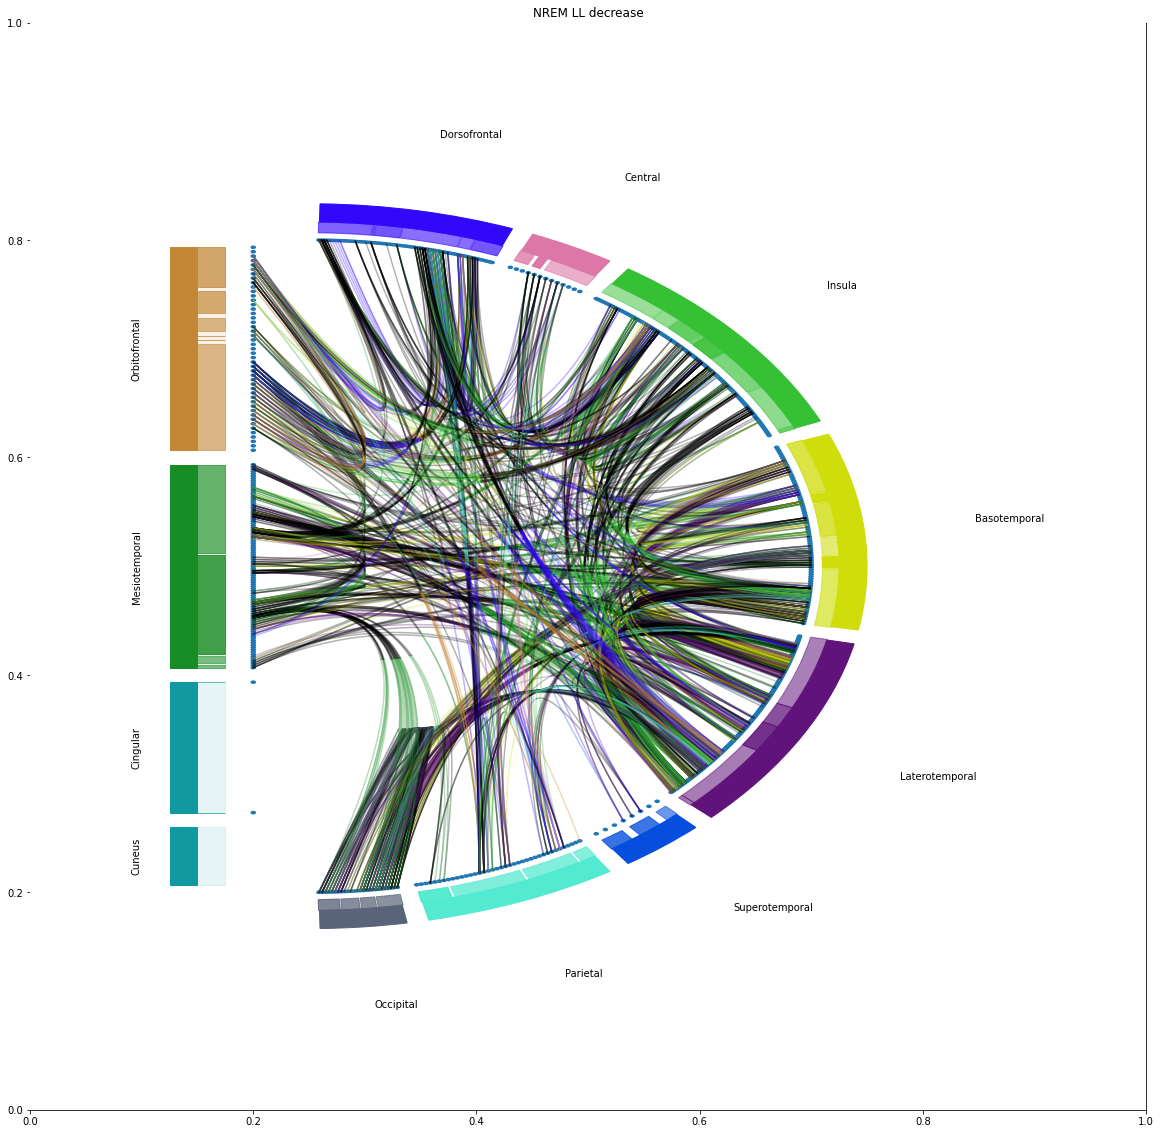

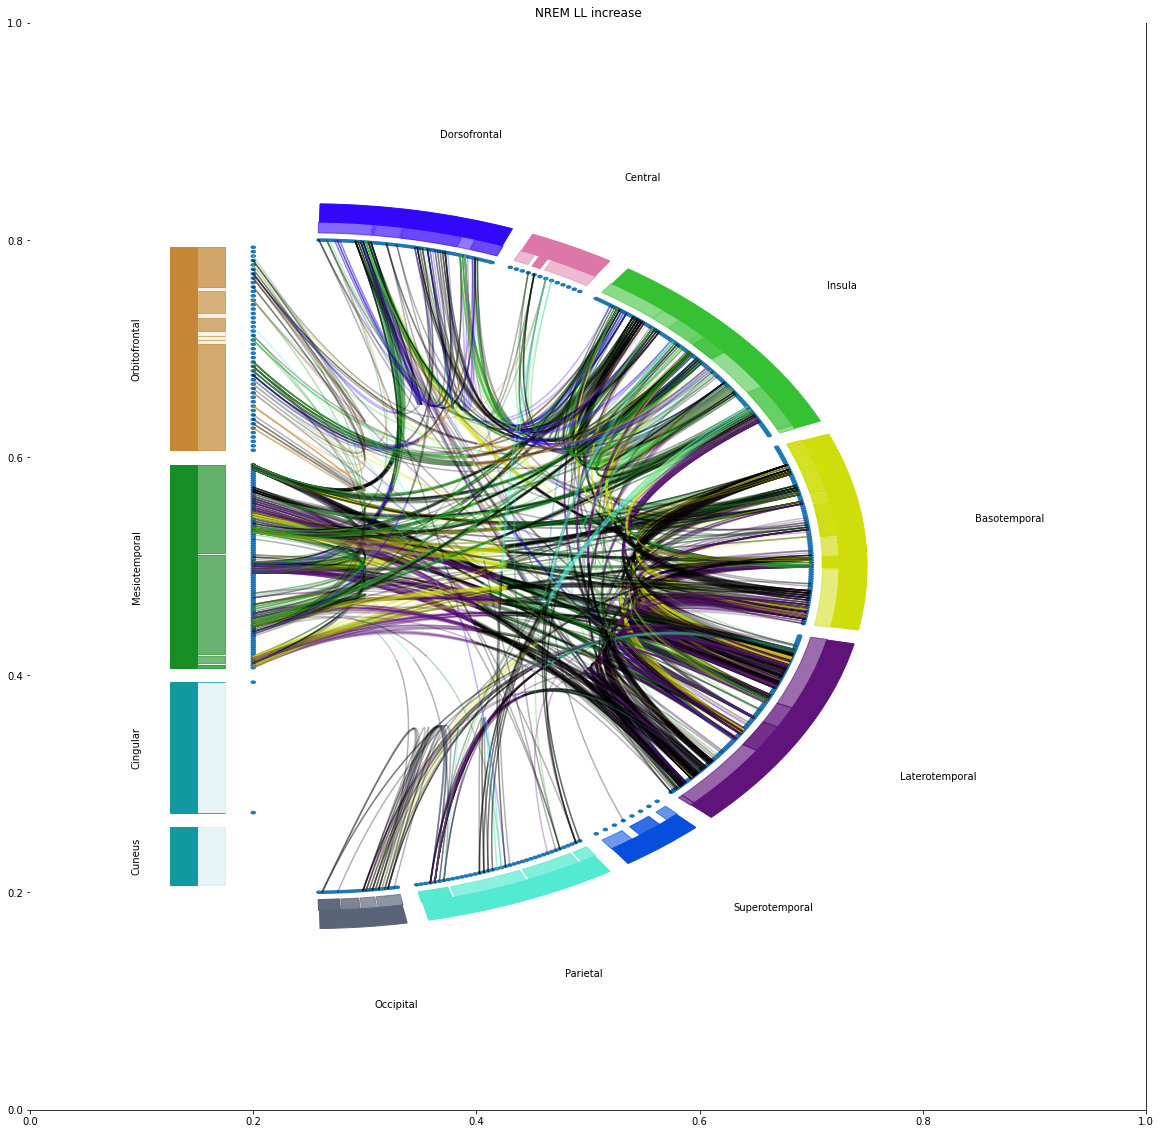

In [15]:
for e, label in zip([-1,1], ['decrease', 'increase']):
    data_edges = data_con[(data_con.d>10)&(data_con.NREM_LL==e)]
    data_edges = data_edges.reset_index(drop=True)
    figsize = (20,20)
    fig = plt.figure(figsize=figsize)
    plt.title('NREM LL '+label)
    ax = fig.add_subplot(1, 1, 1)
    figure_r.plot_nodes_jpt(ax)
    figure_r.plot_con_jpt(data_edges, ax)
    plt.savefig('X:\\4 e-Lab\\EvM\Projects\\EL_experiment\\Analysis\\Patients\\Across\\BrainMapping\\Sleep\\connectogram\\figures\\NREM_LL_'+label+'.png', dpi=300)
    plt.show()

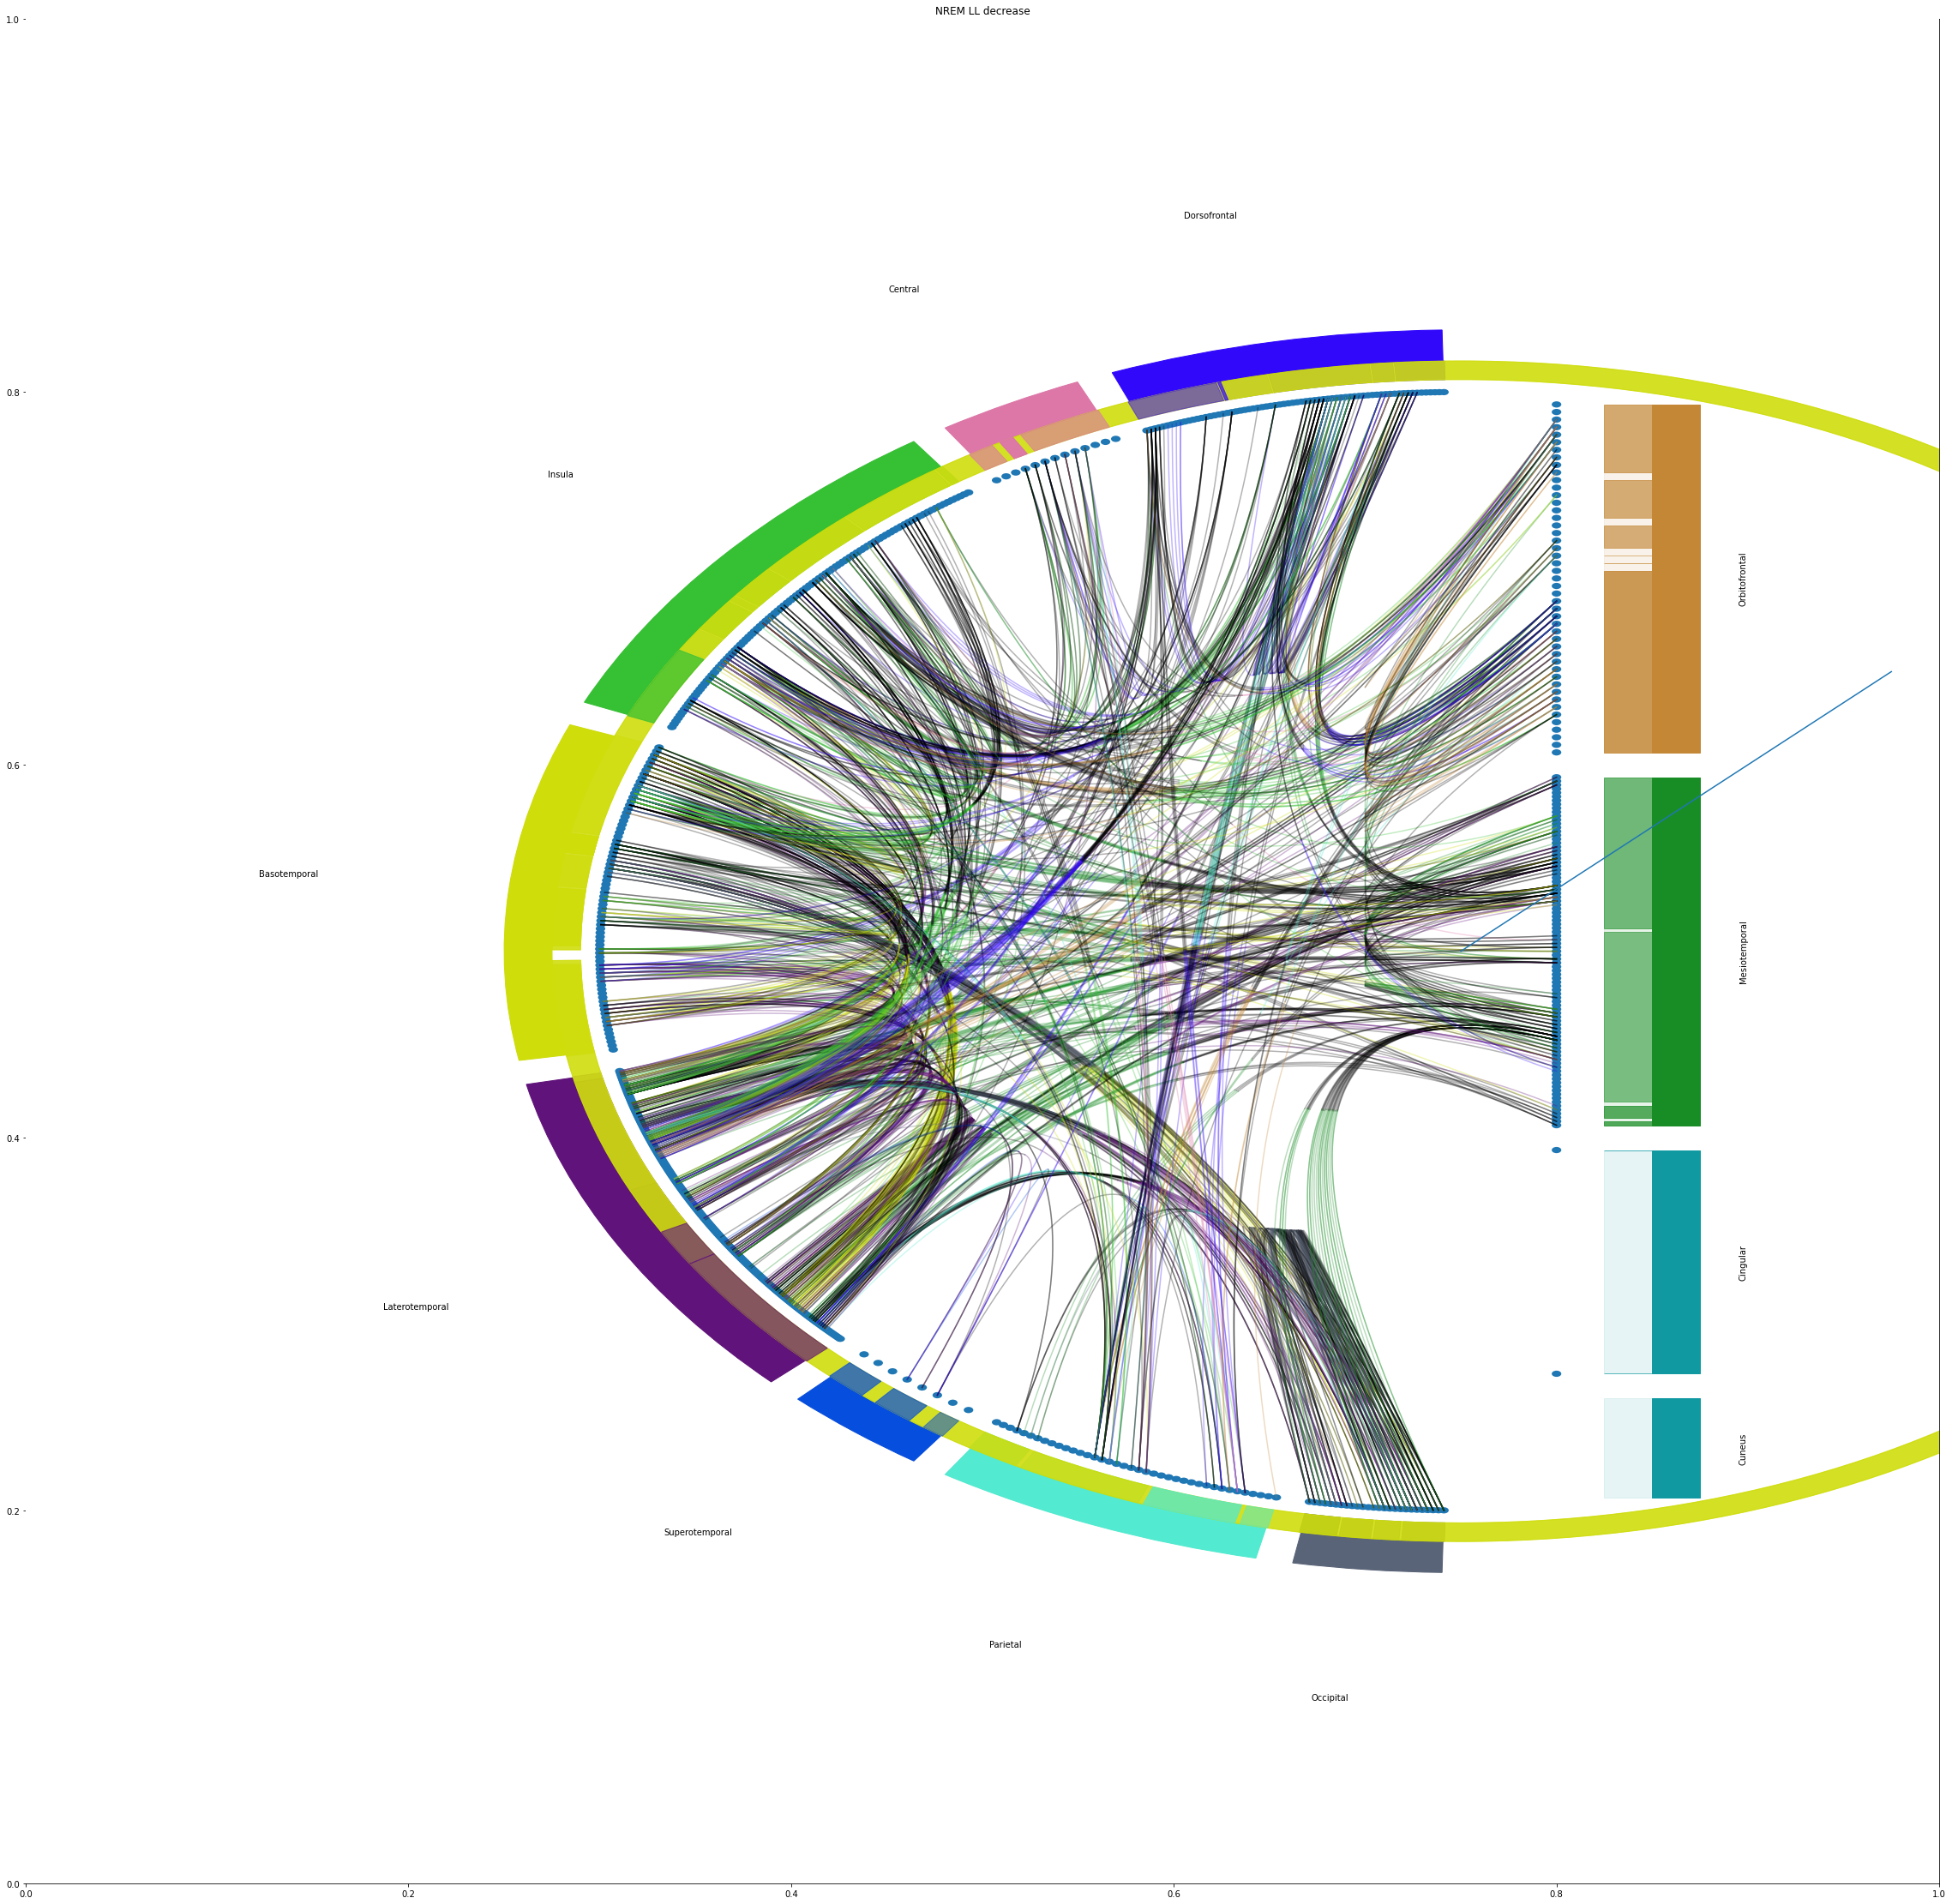

In [10]:
figsize = (40, 40)
fig = plt.figure(figsize=figsize)
plt.title('NREM LL decrease')
ax = fig.add_subplot(1, 1, 1)
figure_l.plot_nodes_jpt(ax)
figure_l.plot_con_jpt(data_edges, ax)
plt.show()


In [8]:
stop

NameError: name 'stop' is not defined

In [ ]:
plot_main = plot_connectogram.main_plot(data_con,data_nodes)

In [ ]:
data_edges = data_con[(data_con.d>80)&(data_con.d<100)&(data_con.Dir_index==1)]
data_edges = data_edges.reset_index(drop=True)
plot_main.plot_con(data_edges, ax = 0)